In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
eda_df = pd.read_csv('eda.csv')

eda_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
eda_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Education_Level,Year_Joined,Month_Joined,Day_Joined,Years_Customer,Days_Customer,Age_Group,Time,Dt_year,Period
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,Graduate,2012,April,Monday,2,971 days,Middel Aged,2012-04-09,2012,3751
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,Graduate,2014,August,Sunday,0,125 days,Middel Aged,2014-08-03,2014,2905
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,Graduate,2013,August,Wednesday,1,472 days,Middel Aged,2013-08-21,2013,3252
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,Graduate,2014,October,Thursday,0,65 days,Adult,2014-10-02,2014,2845
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,Postgraduate,2014,January,Sunday,0,321 days,Adult,2014-01-19,2014,3101


In [6]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2205 non-null   int64  
 1   Year_Birth           2205 non-null   object 
 2   Education            2205 non-null   object 
 3   Marital_Status       2205 non-null   object 
 4   Income               2205 non-null   float64
 5   Kidhome              2205 non-null   int64  
 6   Teenhome             2205 non-null   int64  
 7   Dt_Customer          2205 non-null   object 
 8   Recency              2205 non-null   int64  
 9   MntWines             2205 non-null   int64  
 10  MntFruits            2205 non-null   int64  
 11  MntMeatProducts      2205 non-null   int64  
 12  MntFishProducts      2205 non-null   int64  
 13  MntSweetProducts     2205 non-null   int64  
 14  MntGoldProds         2205 non-null   int64  
 15  NumDealsPurchases    2205 non-null   i

In [9]:
eda_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'TotalMntSpent', 'TotalNumPurchases', 'Total_Acc_Cmp', 'Partner',
       'Children', 'Family_Size', 'Is_Parent', 'Education_Level',
       'Year_Joined', 'Month_Joined', 'Day_Joined', 'Years_Customer',
       'Days_Customer', 'Age_Group', 'Time', 'Dt_year', 'Period'],
      dtype='object')

In [13]:
eda_df['Dt_Customer']

0       2012-04-09
1       2014-08-03
2       2013-08-21
3       2014-10-02
4       2014-01-19
           ...    
2200    2013-06-13
2201    2014-10-06
2202    2014-01-25
2203    2014-01-24
2204    2012-10-15
Name: Dt_Customer, Length: 2205, dtype: object

In [15]:
eda_df.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Z_CostContact', 'Z_Revenue', 'Time', 'Dt_year', 'Dt_Customer'], 
            axis=1, inplace=True)

## K-Means

### 1. 데이터 타입 전처리

In [18]:
# 결혼상태에 따른 파트너 유무

eda_df["Partner"] = eda_df["Partner"].replace({"Yes":1, "No": 0})

더미변수 변환 : https://zephyrus1111.tistory.com/91

In [20]:
# 교육 수준(Undergraduate, Graduate, Postgraduate) 3그룹 -> 더미변수 변환

pd.get_dummies(eda_df, columns = ['Education_Level'])

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Year_Joined,Month_Joined,Day_Joined,Years_Customer,Days_Customer,Age_Group,Period,Education_Level_Graduate,Education_Level_Postgraduate,Education_Level_Undergraduate
0,58138.0,0,0,58,635,88,546,172,88,88,...,2012,April,Monday,2,971 days,Middel Aged,3751,1,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,2014,August,Sunday,0,125 days,Middel Aged,2905,1,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,2013,August,Wednesday,1,472 days,Middel Aged,3252,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,2014,October,Thursday,0,65 days,Adult,2845,1,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,2014,January,Sunday,0,321 days,Adult,3101,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,2013,June,Thursday,1,541 days,Middel Aged,3321,1,0,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,2014,October,Monday,0,61 days,Senior Citizen,2841,0,1,0
2202,56981.0,0,0,91,908,48,217,32,12,24,...,2014,January,Saturday,0,315 days,Adult,3095,1,0,0
2203,69245.0,0,1,8,428,30,214,80,30,61,...,2014,January,Friday,0,316 days,Middel Aged,3096,0,1,0


In [24]:
eda_df.drop(['Education_Level'], axis=1, inplace=True)

In [26]:
eda_df.drop(['Month_Joined', 'Day_Joined'], axis=1, inplace=True)

문자열 제거 : https://acdongpgm.tistory.com/166

In [31]:
eda_df['Days_Customer'] = eda_df['Days_Customer'].str.replace(' days', repl=r'', regex=True)

object to int : https://sikaleo.tistory.com/39

In [35]:
eda_df['Days_Customer'] = eda_df['Days_Customer'].astype(int)

In [36]:
eda_df['Days_Customer']

0       971
1       125
2       472
3        65
4       321
       ... 
2200    541
2201     61
2202    315
2203    316
2204    782
Name: Days_Customer, Length: 2205, dtype: int32

In [38]:
# 나이('Under 18','Young adult','Adult','Middel Aged','Senior Citizen') 5그룹 -> 더미변수 변환

pd.get_dummies(eda_df, columns = ['Age_Group'])

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Family_Size,Is_Parent,Year_Joined,Years_Customer,Days_Customer,Period,Age_Group_Adult,Age_Group_Middel Aged,Age_Group_Senior Citizen,Age_Group_Young adult
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,0,2012,2,971,3751,0,1,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,3,1,2014,0,125,2905,0,1,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,2,0,2013,1,472,3252,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,3,1,2014,0,65,2845,1,0,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,3,1,2014,0,321,3101,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,3,1,2013,1,541,3321,0,1,0,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,5,1,2014,0,61,2841,0,0,1,0
2202,56981.0,0,0,91,908,48,217,32,12,24,...,1,0,2014,0,315,3095,1,0,0,0
2203,69245.0,0,1,8,428,30,214,80,30,61,...,3,1,2014,0,316,3096,0,1,0,0


In [40]:
eda_df.drop(['Age_Group'], axis=1, inplace=True)

### 2. MinMaxScaler

In [44]:
eda_df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,TotalNumPurchases,Total_Acc_Cmp,Partner,Children,Family_Size,Is_Parent,Year_Joined,Years_Customer,Days_Customer,Period
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,14.887982,0.450340,0.644898,0.948753,2.593651,0.715193,2013.027664,0.972336,512.062585,3292.062585
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,7.615277,0.894075,0.478653,0.749231,0.906197,0.451425,0.686039,0.686039,232.528808,232.528808
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2012.000000,0.000000,0.000000,2780.000000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,8.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2013.000000,1.000000,340.000000,3120.000000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,15.000000,0.000000,1.000000,1.000000,3.000000,1.000000,2013.000000,1.000000,513.000000,3293.000000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,21.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2013.000000,1.000000,686.000000,3466.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,43.000000,5.000000,1.000000,3.000000,5.000000,1.000000,2014.000000,2.000000,1063.000000,3843.000000


In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(eda_df)

### 3. KMeans

In [11]:
from sklearn.cluster import KMeans

In [48]:
k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(eda_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
eda_df['cluster'] = model.fit_predict(data_scale)

In [49]:
# 군집의 중심점(centroids)

centers = model.cluster_centers_
print(centers)

[[ 3.48711811e-01  3.95798319e-01  2.90756303e-01  4.99940582e-01
   6.88479008e-02  3.66538575e-02  2.30549263e-02  4.66370332e-02
   2.92962987e-02  5.34097751e-02  1.49131653e-01  1.02894491e-01
   3.22328932e-02  3.11312217e-01  3.00672269e-01  6.72268908e-02
   3.86554622e-02  3.36134454e-03  1.68067227e-02  3.36134454e-03
   5.04201681e-03  4.36974790e-02  4.55222089e-01  7.21241830e-02
   2.31737346e-01  3.46218487e-02  1.00000000e+00  4.57703081e-01
   5.93277311e-01  1.00000000e+00  7.23529412e-01  2.76470588e-01
   3.54716713e-01  3.54716713e-01]
 [ 6.78423898e-01  9.75609756e-03  2.43902439e-02  4.10248830e-01
   5.21340238e-01  3.10846918e-01  2.79589961e-01  3.38600622e-01
   2.45689816e-01  2.36167464e-01  7.31707317e-02  2.01264679e-01
   2.16724739e-01  6.15009381e-01  1.66341463e-01  2.00000000e-01
   2.92682927e-01  5.80487805e-01  4.48780488e-01  1.02439024e-01
   4.87804878e-03  8.34146341e-01  4.73257840e-01  6.13250097e-01
   4.78956324e-01  4.91707317e-01  4.8780

In [52]:
# k에 따라 inertia_(군집 내 거리제곱합의 합)이 어떻게 변하는 지 시각화
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(eda_df)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.figure(1 , figsize = (12, 6))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

In [53]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

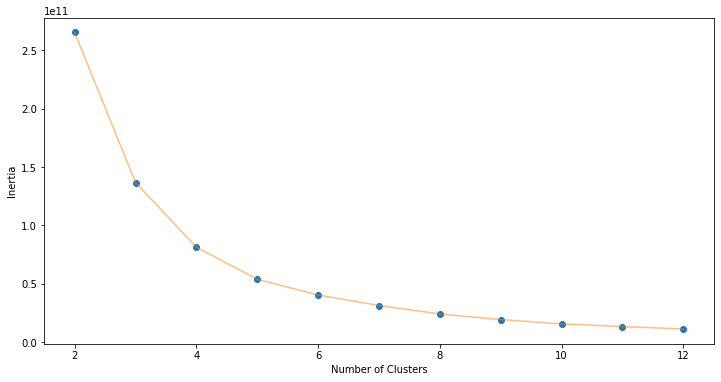

In [54]:
# 6 정도가 elbow point로 보인다.
change_n_clusters(n_clusters, eda_df)

#### 3-1. K-means 클러스터링 k 결정(Elbow Method)

In [58]:
import sys
# !conda install pip     # pip 미설치일 경우
!{sys.executable} -m pip install yellowbrick 


  Using cached yellowbrick-1.4-py3-none-any.whl (274 kB)


In [59]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(eda_df)

ImportError: cannot import name 'available_if' from 'sklearn.utils.metaestimators' (c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\metaestimators.py)

### 4. dendrogram

In [50]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
# 순서대로 single linkage, complete linkage, average linkage, centroid linkage, ward linkage 적용
# 거리를 기준으로 proximity matrix를 만들고 이에 따라 cluster를 키워 나감
# 군집 간 거리를 측정하는 방식이 달라지니 군집화가 이루어진 결과도 확연히 차이가 났다.

linkage_list = ['single', 'complete', 'average', 'centroid', 'ward']
data = eda_df

fig, axes = plt.subplots(nrows=len(linkage_list), ncols=2, figsize=(16, 35))
for i in range(len(linkage_list)):
    for j in range(len(data)):
        hierarchical_single = linkage(data[j], method=linkage_list[i])
        dn = dendrogram(hierarchical_single, ax=axes[i][j])
        axes[i][j].title.set_text(linkage_list[i])
plt.show()